<a href="https://colab.research.google.com/github/Sanjana-Savadatti/AICTE_Project/blob/Project/%20Identifying%20Shopping%20Trends%20using%20Data%20Analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 cleaned_data.xlsx  'Colab Notebooks'   CRM_Data.xlsx   shoppingtrends.csv   summary_report.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           39

<ipython-input-1-5d9d92230b00>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


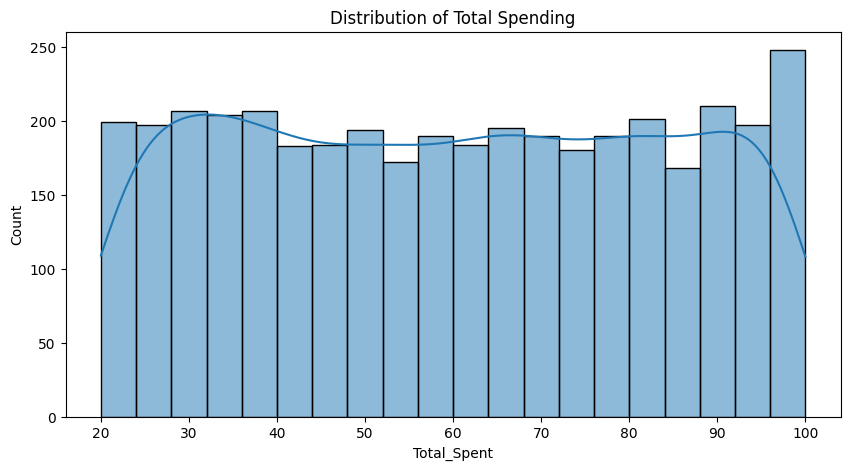

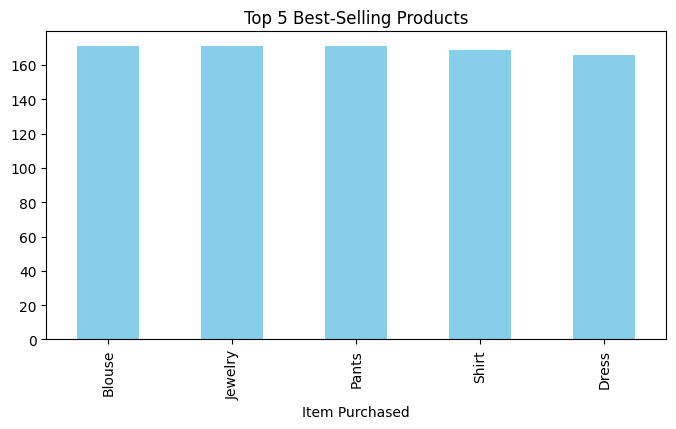

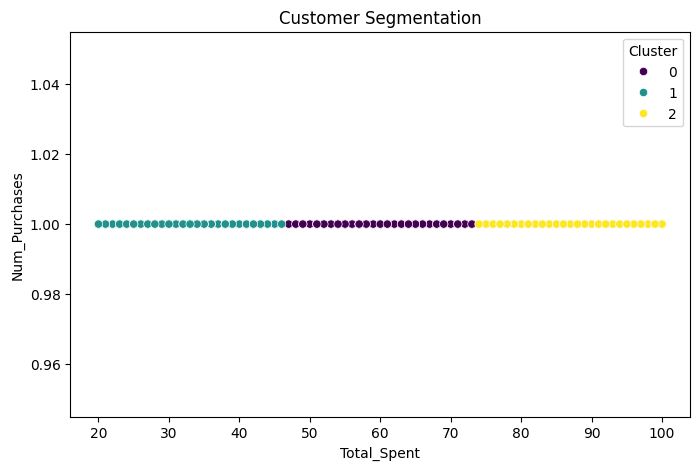

Processed data saved successfully.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount('/content/drive')

# Verify files in Drive
!ls "/content/drive/My Drive/"

# Load dataset
dataset_path = '/content/drive/My Drive/shoppingtrends.csv'
try:
    df = pd.read_csv(dataset_path)
except FileNotFoundError:
    print(f"Error: File not found at {dataset_path}")
    exit()

# Display basic info
print(df.info())
print(df.head())

# Ensure relevant columns exist
required_columns = ['Customer ID', 'Purchase Amount (USD)', 'Item Purchased']
for col in required_columns:
    if col not in df.columns:
        print(f"Error: Missing required column '{col}' in dataset")
        exit()

# Create Total_Spent and Num_Purchases
df['Total_Spent'] = df.groupby('Customer ID')['Purchase Amount (USD)'].transform('sum')
df['Num_Purchases'] = df.groupby('Customer ID')['Customer ID'].transform('count')

# Handle missing values
df.fillna(df.select_dtypes(include=np.number).median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Descriptive statistics
print(df.describe())

# Visualizing purchase trends
plt.figure(figsize=(10,5))
sns.histplot(df['Total_Spent'].dropna(), bins=20, kde=True)
plt.title('Distribution of Total Spending')
plt.show()

# Top 5 best-selling products
top_products = df['Item Purchased'].value_counts().head(5)
plt.figure(figsize=(8,4))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 5 Best-Selling Products')
plt.show()

# Customer Segmentation using K-Means
X = df[['Total_Spent', 'Num_Purchases']]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Total_Spent'], y=df['Num_Purchases'], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.show()

# Save processed data
df.to_csv('/content/drive/My Drive/processed_shopping_data.csv', index=False)
print("Processed data saved successfully.")
